In [1]:
import pandas as pd
import numpy as np

In [2]:
from collections import Counter

In [4]:
video_je = pd.read_csv('./blackpink/video_je.csv', sep='|', encoding = 'utf-8')
mag_je = pd.read_csv('./magazine/final/mag_jenny_adfn_2.csv', encoding = 'utf-8', sep = '|')

In [5]:
video_je['magazine'] = 'YOUTUBE'
video_je['brand'] = 'YOUTUBE'
video_je['word_jenny'] = video_je['contents']

In [8]:
mag_je = mag_je[['magazine', 'brand', 'title', 'word_jenny']]

In [9]:
video_je = video_je[['magazine', 'brand', 'title', 'word_jenny']]

In [11]:
tot_je = pd.concat([video_je, mag_je])

In [12]:
tot_je.reset_index(drop=True, inplace = True)

In [13]:
tot_je.to_csv('./magazine/final/mag-video_je.csv', sep='|', encoding = 'utf-8', index = False)

In [14]:
tot_je[tot_je['word_jenny'].isnull()]

,magazine,brand,title,word_jenny
225,fashionn,Je,"로제, 생로랑 홍보대사!블랙핑크 멤버 모두 럭셔리 브랜드 싹쓸이",NaN
287,M,Je,제니의 젠틀홈 투어,NaN
288,M,Je,제니와 젠틀몬스터가 함께 꾸민 공간,NaN
289,M,Je,CHANEL,NaN
295,M,Je,마리끌레르 X 샤넬,NaN
296,M,Je,Who Am I,NaN


In [15]:
tot_je.drop([225, 287, 288, 289, 295, 296], inplace = True)

In [16]:
tot_je.reset_index(drop=True, inplace = True)

In [53]:
import re
 
text = u'This dog \U0001f602'
print(text) # with emoji
 
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
print(emoji_pattern.sub(r'', text)) # no emoji

This dog 😂
This dog 


In [54]:
tot_je['word_jenny'] = tot_je['word_jenny'].str.replace(emoji_pattern, '').str.replace('♥', '').str.replace('❤️', '').str.replace('❤', '')

In [55]:
tot_je['word_jenny']

0      ['좋은 신에게 제니 ', '제니언니 금발머리 하니깐 외국인 같아요....존나 예쁘...
1      ['저 애매한 길이의 생머리와 샤네루 상의랑 하얀색 옷인거 거기에 이노래까지 진짜 ...
2      ['2년이 지난 지금 봐도 여전히 바지는 이해할 수가 없다..BLACKPINK..얼...
3      ['제니 저런 스타일링 진짜 잘 어울리고 멋있다..스타일링이 대박♡', '진짜 미친...
4      ['Something about this whole solo debut remind...
                             ...                        
346    서로의 팬임을 인증한 두 스타, 8월 28일 BLACKPINK와 세레나 고메즈가 함...
347    내셔널 아이스크림 데이’를 기념한 BLACKPINK의 귀여운 포스팅., 제니와 리사...
348    한국 신진 디자이너부터 하이 패션 브랜드까지 섭렵한 블핑, 6월 26일 드디어 BL...
349    BLACKPINK 로제, 리사, 지수의 솔로곡이 발매된다., , 오는 9월 첫 정규...
350    K팝 그룹 최초! BLACKPINK <뚜두뚜두(DDU-DU DDU-DU)> 뮤직비디...
Name: word_jenny, Length: 351, dtype: object

## list(article_list) 생성 후 append

In [56]:

article_list = []
for word in tot_je['word_jenny']:
    article_list.append(word)

In [57]:
len(article_list)

351

In [58]:
article_list[6]

"['어떻게 예쁘다 춤 잘 추고 날씬하고 키 크고 성격 좋고 목소리 예쁘다 유학파에 셀럽이기까지 하냐', '추운데 촬영하느라 수고했어요~영상 너무 멋있다 요월래 멋있다 ,예뻤는데 더 멋있다  예쁘다 졌어♡♡', '너무 예쁘다 귀엽다  사랑스럽다 매력쩐다 진짜', '미쳤다 ㅜㅜㅜㅜ너무 예쁘다 ', '언니 완전귀엽다 요ㅜㅜㅜㅜㅠ', 'ㅜㅎ마마 혇 뭐ㅑ ㄱ 자자자자', '추운데 고생했어요~!', 'JENNIE...LOVE YOU.......SO CUTE제니...사랑해요...귀엽다 ㅠㅠ', '헤이 제니 ... 나는 너를 정말로 우상 숭배한다.', '제니 사랑해!!!!!!!!!!!!!!!!ㅠㅠㅠㅠ', '예쁘다♡♡♡', '0:35 아 제니 존나 귀엽다 여웤ㅎㅋㅎㅋㅎㅋㅎㅎㅋㅎㅋㅎㅋㅎㅋㅋㅋㅋ', '세니', '2:11 심정지각', '네, 한 보이는데. ', '우리 제니 머리 다 상하겠다ㅠ', 'Great work queen 제니  수고했어요 ', '옷 예쀼땅', '보면서 런던같다 쇼디치 같다 생각했었는데 진짜 런던이였다니ㅠㅠ 진짜 보고싶었다', '제니 사랑해요', '너 내꺼가 되라!', '제니님 너무 좋아요.', '나는 너를  사랑해.블븍핀 크.', '안녕하세요 제니 나는 당신의 모든 상품과 BLACKPINK 상품입니다. 저는 당신과 Rose, Jisso, 리사를 정말로 사랑합니다.너를 사랑해 ', '편집이 느어무 잔잔혀..', '왜 한국 댓글은 없는거야 !', '제니 인사성 진짜 밝다..', '아메리카노 마셔서 잠 안오는데 재밌는거 많이 나왔으면 좋겠다.너튜뷰에~~', '제니야ㅠㅠㅠㅠ너무 귀엽다 ㅠㅠㅠ와이지제발 이런영상 자주좀 올려줘 ㅠㅠㅠㅠㅠㅠㅠㅠ', '으악 ㅠㅠㅠㅠㅠㅠㅜㅠㅠ 너무너무너어어어므 예쁘다  ㅠㅠㅠㅠㅠㅠ', '젼잼~~~ 제니 존나 귀엽다 ~~~', '나는 그 노래가 좋아하는 것을 좋아했다.  너와 다른 멤버들도 사랑해. ✌️❣️', '좋아합니다', '한국 인인 분 소오오오온❣️구걸 죄송하지만 한번 해보구 싶었어욤!!제니는 역시 예뻥🥰', '젠 살앙해', '제니언

## 트위터 패키지 안에 konlpy 모듈 호출

In [21]:
from konlpy.tag import Twitter

In [22]:
twitter = Twitter()

C:\Users\wnsgo\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


### 각 문장별로 형태소 구분하기

In [59]:
sentences_tag = []

for sentence in article_list:
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)
    
    

print(len(sentences_tag))


351


In [60]:
sentences_tag[0]

[("['", 'Punctuation'),
 ('좋은', 'Adjective'),
 ('신', 'Noun'),
 ('에게', 'Josa'),
 ('제니', 'Noun'),
 ("',", 'Punctuation'),
 ("'", 'Punctuation'),
 ('제니', 'Noun'),
 ('언니', 'Suffix'),
 ('금발머리', 'Noun'),
 ('하', 'Noun'),
 ('니깐', 'Josa'),
 ('외국인', 'Noun'),
 ('같아요', 'Adjective'),
 ('....', 'Punctuation'),
 ('존나', 'Noun'),
 ('예쁘다', 'Adjective'),
 ("',", 'Punctuation'),
 ("'", 'Punctuation'),
 ('왠지', 'Adverb'),
 ('모르겠지만', 'Verb'),
 ('분위기', 'Noun'),
 ('가', 'Josa'),
 ('이번', 'Noun'),
 ('엑소', 'Noun'),
 ('컴백', 'Noun'),
 ('티저', 'Noun'),
 ('랑', 'Josa'),
 ('비슷한거', 'Adjective'),
 ('같아여', 'Adjective'),
 ('결론', 'Noun'),
 ('은', 'Josa'),
 ('좋음', 'Adjective'),
 ("',", 'Punctuation'),
 ("'", 'Punctuation'),
 ('터키', 'Noun'),
 ('에', 'Josa'),
 ('와주세요', 'Verb'),
 ('BLACKP', 'Alpha'),
 ('İ', 'Foreign'),
 ('NK', 'Alpha'),
 ("',", 'Punctuation'),
 ("'", 'Punctuation'),
 ('아름다운', 'Adjective'),
 ('금발', 'Noun'),
 ('머리', 'Noun'),
 ('를', 'Josa'),
 ('가진', 'Verb'),
 ('제니', 'Noun'),
 ("',", 'Punctuation'),
 ("'", 'Punctuation

In [61]:
twitter.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

### stopword 추가

In [62]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [63]:
sw_df.columns = ['stopword']

In [64]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [65]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [66]:
stop_words[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [67]:
add_0 = []
for w in add_0:
    stop_words.append(w)

In [68]:
len(stop_words)

675

In [69]:
['진짜', '존나', '보고', '그냥', '카이', '이광수', '광수', '런닝맨', '❤️', '없는', '유재석', '❤', '♥', '있고']

['진짜',
 '존나',
 '보고',
 '그냥',
 '카이',
 '이광수',
 '광수',
 '런닝맨',
 '❤️',
 '없는',
 '유재석',
 '❤',
 '♥',
 '있고']

### 1. 명사 혹은 형용사인 품사만 선별해 리스트에 담기

In [70]:
noun_adj_list= []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if tag in ['Noun', 'Adjective', 'Alpha', 'Determiner', 'Foreign', 'Verb']:
            if not word in stop_words:
                noun_adj_list.append(word)

In [71]:
len(noun_adj_list)

154977

In [72]:
noun_adj_list[:20]

['좋은',
 '신',
 '제니',
 '제니',
 '금발머리',
 '외국인',
 '같아요',
 '존나',
 '예쁘다',
 '모르겠지만',
 '분위기',
 '엑소',
 '컴백',
 '티저',
 '비슷한거',
 '같아여',
 '결론',
 '좋음',
 '터키',
 '와주세요']

In [73]:
noun_adj_list[:10]

['좋은', '신', '제니', '제니', '금발머리', '외국인', '같아요', '존나', '예쁘다', '모르겠지만']

In [74]:
ADFN_list= []
for sentence1 in sentences_tag:
    words = []
    for word, tag in sentence1:
        if tag in ['Adjective', 'Determiner','Foreign','Noun', 'Alpha', 'Verb']:
            if word not in stop_words:
                words.append(word)
    ADFN_list.append(words)

In [75]:
len(ADFN_list)

351

In [76]:
ADFN_list[0]

['좋은',
 '신',
 '제니',
 '제니',
 '금발머리',
 '외국인',
 '같아요',
 '존나',
 '예쁘다',
 '모르겠지만',
 '분위기',
 '엑소',
 '컴백',
 '티저',
 '비슷한거',
 '같아여',
 '결론',
 '좋음',
 '터키',
 '와주세요',
 'BLACKP',
 'İ',
 'NK',
 '아름다운',
 '금발',
 '머리',
 '가진',
 '제니',
 '효린',
 '인줄',
 '와우',
 '커널',
 '머리',
 '제니',
 '놀랍니다',
 '처음',
 '효린인줄',
 '완전',
 '기대',
 '제니',
 '금발',
 '앍',
 '제니',
 '금발',
 '미쳤어',
 '내',
 '심장',
 '터뜨려주거',
 '제니',
 '얼굴',
 '어쩌면',
 '엏',
 '세상',
 '제일',
 '존나',
 '예쁘다',
 '♡',
 '분위기',
 '미쳐',
 '써',
 '존나',
 '예쁘다',
 '그냥',
 '이쁘단',
 '말로',
 '모자람',
 '제니',
 '그냥',
 '여신',
 '이었어',
 '젠',
 '여신',
 '펑생',
 '떠받',
 '들고',
 '살게요',
 '김젠젠',
 '사랑',
 '해',
 '♡♡♡♡♡♡']

In [77]:
tot_je['ADFN'] = ADFN_list

### 선별된 품사별 빈도수 계산 & 상위 빈도 10위까지 출력

In [78]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('제니', 9276), ('진짜', 2984), ('BLACKPINK', 2640), ('귀엽다', 2144), ('예쁘다', 1817), ('해', 924), ('사람', 849), ('사랑', 805), ('거', 803), ('얼굴', 671), ('내', 629), ('존나', 626), ('하는', 609), ('영상', 590), ('더', 533), ('광고', 532), ('개', 511), ('언니', 508), ('말', 498), ('노래', 483), ('무대', 459), ('할', 452), ('보고', 451), ('넘', 434), ('매력', 423), ('한', 410), ('잘', 408), ('그냥', 404), ('수', 397), ('뭐', 391), ('아이돌', 381), ('옷', 367), ('생각', 337), ('젠득', 321), ('여자', 297), ('팬', 292), ('CHANEL', 288), ('실력', 283), ('걸', 282), ('있는', 281), ('안', 281), ('정말', 276), ('요', 275), ('데', 274), ('스타일', 273), ('영어', 270), ('느낌', 265), ('했다', 264), ('같은', 257), ('보면', 257), ('패션', 255), ('하고', 244), ('움', 243), ('임', 243), ('애', 239), ('앞머리', 238), ('눈', 229), ('난', 226), ('머리', 216), ('같음', 215), ('하면', 213), ('게', 212), ('듯', 211), ('스타', 209), ('예능', 209), ('지수', 206), ('카이', 204), ('리사', 202), ('랩', 202), ('처음', 199), ('♡', 199), ('모습', 198), ('춤', 193), ('완전', 192), ('헤어', 191), ('컬러', 191), ('해서', 188), ('같아'

In [79]:
# # 한 글자인 단어는 제외

# for i, v in enumerate(noun_adj_list):
#     if len(v)<2:
#         noun_adj_list.pop(i)

In [80]:
count = Counter(noun_adj_list)

In [81]:
word_list = count.most_common(200)
for v in word_list:
    print(v)

('제니', 9276)
('진짜', 2984)
('BLACKPINK', 2640)
('귀엽다', 2144)
('예쁘다', 1817)
('해', 924)
('사람', 849)
('사랑', 805)
('거', 803)
('얼굴', 671)
('내', 629)
('존나', 626)
('하는', 609)
('영상', 590)
('더', 533)
('광고', 532)
('개', 511)
('언니', 508)
('말', 498)
('노래', 483)
('무대', 459)
('할', 452)
('보고', 451)
('넘', 434)
('매력', 423)
('한', 410)
('잘', 408)
('그냥', 404)
('수', 397)
('뭐', 391)
('아이돌', 381)
('옷', 367)
('생각', 337)
('젠득', 321)
('여자', 297)
('팬', 292)
('CHANEL', 288)
('실력', 283)
('걸', 282)
('있는', 281)
('안', 281)
('정말', 276)
('요', 275)
('데', 274)
('스타일', 273)
('영어', 270)
('느낌', 265)
('했다', 264)
('같은', 257)
('보면', 257)
('패션', 255)
('하고', 244)
('움', 243)
('임', 243)
('애', 239)
('앞머리', 238)
('눈', 229)
('난', 226)
('머리', 216)
('같음', 215)
('하면', 213)
('게', 212)
('듯', 211)
('스타', 209)
('예능', 209)
('지수', 206)
('카이', 204)
('리사', 202)
('랩', 202)
('처음', 199)
('♡', 199)
('모습', 198)
('춤', 193)
('완전', 192)
('헤어', 191)
('컬러', 191)
('해서', 188)
('같아', 187)
('중', 184)
('최고', 183)
('는', 182)
('정도', 179)
('표정', 178)
('목소리', 178)


## 워드클라우드 만들기

In [82]:

import matplotlib.pyplot as plt

### 패키지 설치 및 폰트 어쩌구

In [83]:
import matplotlib.font_manager as fm

# 이용 가능한 폰트 중 '고딕'만 선별
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothB.ttc
HYGothic-Extra C:\WINDOWS\Fonts\H2GTRE.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framdit.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothR.ttc
MS Gothic C:\WINDOWS\Fonts\msgothic.ttc
HYGothic-Medium C:\WINDOWS\Fonts\H2GTRM.TTF
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framd.ttf


In [84]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### wordcloud 그리기

In [85]:
from wordcloud import WordCloud

In [86]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

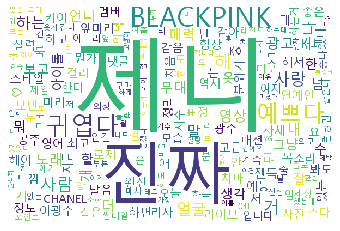

In [87]:
wc.generate_from_frequencies(dict(word_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('tot_jenny_adj_twitter.png')

In [40]:
# you_je.to_csv('./magazine/final/you_je_adfn.csv', sep='|', index = False, encoding = 'utf-8')

In [88]:
tot_je.to_csv('./magazine/final/video_je_adfn.csv', sep='|', index = False, encoding = 'utf-8')

In [46]:
jennytop200 = pd.DataFrame(word_list)

In [48]:
jennytop200.columns = ['word', 'count']

In [49]:
jennytop200

,word,count
0,제니,748
1,BLACKPINK,327
2,스타일,197
3,패션,192
4,컬러,187
...,...,...
195,지난,22
196,국제공항,22
197,뒤,21
198,준,21


In [51]:
jennytop200.to_csv('./magazine/final/jennytop200.csv', sep='|', encoding = 'utf-8', index = False)